In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [3]:
def plot_dist(mu, sd, color=None, shade=True, **kwargs):

    plt.plot(x, ss.norm(loc=mu, scale=sd).pdf(x), color=color, **kwargs, alpha=.8)

    if shade:
        plt.fill_between(x, 0.0, ss.norm(loc=mu, scale=sd).pdf(x), alpha=0.3, color=color)

    sns.despine()

In [4]:
def get_posterior(mu1, sd1, mu2, sd2):
    var1, var2 = sd1**2, sd2**2
    return mu1 + (var1/(var1+var2))*(mu2 - mu1), np.sqrt((var1*var2)/(var1+var2))

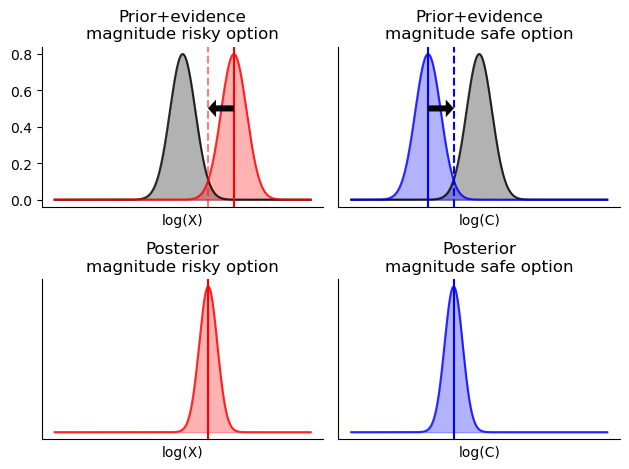

In [5]:
x = np.linspace(0, 10, 1000)

mu_prior, std_prior = 5., .5
mu_evidence_safe, std_evidence_safe = 3.0, .5
# mu_evidence_risky, std_evidence_risky = 7.0, .5
mu_evidence_risky, std_evidence_risky = 7.0, .5
mu_posterior_risky, std_posterior_risky = get_posterior(mu_evidence_risky, std_evidence_risky, mu_prior, std_prior)
mu_posterior_safe, std_posterior_safe = get_posterior(mu_evidence_safe, std_evidence_safe, mu_prior, std_prior)

ax = plt.subplot(221)
plt.title('Prior+evidence\nmagnitude risky option')
plot_dist(mu_prior, std_prior, color='black', label='Prior')
plot_dist(mu_evidence_risky, std_evidence_risky, color='red', label='Evidence risky option')
ax.annotate('', xytext=(mu_evidence_risky, .5), xy=(mu_posterior_risky, 0.5), arrowprops={"color":"black", "linewidth":.25, "headlength":5.5})
plt.axvline(mu_evidence_risky, c='red', ls='-')
plt.axvline(mu_posterior_risky, c='red', ls='--', alpha=.5)
plt.xlabel('log(X)')
plt.xticks([])

ax = plt.subplot(222)
plt.title('Prior+evidence\nmagnitude safe option')
plot_dist(mu_prior, std_prior, color='black', label='Prior')
plot_dist(mu_evidence_safe, std_evidence_safe, color='blue', label='Evidence safe option')
ax.annotate('', xytext=(mu_evidence_safe, .5), xy=(mu_posterior_safe, 0.5), arrowprops={"color":"black", "linewidth":.25, "headlength":5.5})
plt.axvline(mu_evidence_safe, c='blue', ls='-')
plt.axvline(mu_posterior_safe, c='blue', ls='--')
plt.xlabel('log(C)')
plt.yticks([])
plt.xticks([])

plt.subplot(223)
plt.title('Posterior\nmagnitude risky option')
plot_dist(mu_posterior_risky, std_posterior_risky, color='red', label='Evidence risky option')
plt.axvline(mu_posterior_risky, c='red', ls='-')
plt.xlabel('log(X)')
plt.yticks([])
plt.xticks([])

ax = plt.subplot(224)
plt.title('Posterior\nmagnitude safe option')
plot_dist(mu_posterior_safe, std_posterior_safe, color='blue', label='Evidence risky option')
plt.axvline(mu_posterior_safe, c='blue', ls='-')
plt.xlabel('log(C)')
plt.yticks([])
plt.xticks([])

plt.tight_layout()

In [6]:
plt.fill_betweenx?

Signature:
plt.fill_betweenx(
    y,
    x1,
    x2=0,
    where=None,
    step=None,
    interpolate=False,
    *,
    data=None,
    **kwargs,
)
Docstring:
Fill the area between two vertical curves.

The curves are defined by the points (*y*, *x1*) and (*y*,
*x2*).  This creates one or multiple polygons describing the filled
area.

You may exclude some vertical sections from filling using *where*.

By default, the edges connect the given points directly.  Use *step*
if the filling should be a step function, i.e. constant in between
*y*.

Parameters
----------
y : array (length N)
    The y coordinates of the nodes defining the curves.

x1 : array (length N) or scalar
    The x coordinates of the nodes defining the first curve.

x2 : array (length N) or scalar, default: 0
    The x coordinates of the nodes defining the second curve.

where : array of bool (length N), optional
    Define *where* to exclude some vertical regions from being filled.
    The filled regions are defined by t

In [7]:
def plot_dist(x, mu, sd, color=None, shade=True, norm=True, **kwargs):

    y = np.linspace(2, 8, 1000)
    p = ss.norm(loc=mu, scale=sd).pdf(y)
    if norm:
        p /= p.max()

    plt.plot(x + p, y, color=color, **kwargs, alpha=1.0)

    # plt.plot(x, ss.norm(loc=mu, scale=sd).pdf(x), color=color, **kwargs, alpha=.8)

    if shade:
        plt.fill_betweenx(y, x, x+p, alpha=0.3, color=color)

    # sns.despine()

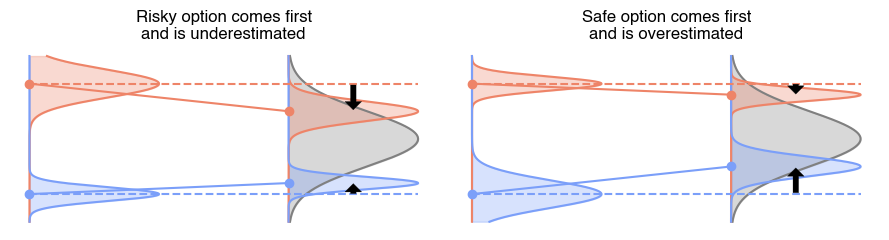

In [8]:
palette = sns.color_palette('coolwarm', 4)[::-1]

plt.subplot(121)
mu_evidence_risky, std_evidence_risky = 7.0, .5
mu_evidence_safe, std_evidence_safe = 3.0, .25
mu_prior, std_prior = 5.0, .5
mu_posterior_risky, std_posterior_risky = get_posterior(mu_evidence_risky, std_evidence_risky, mu_prior, std_prior)
mu_posterior_safe, std_posterior_safe = get_posterior(mu_evidence_safe, std_evidence_safe, mu_prior, std_prior)


plot_dist(2.0, 7.0, .5, shade=True, color=palette[0])
plot_dist(2.0, 3.0, .25, shade=True, color=palette[3])
plot_dist(4.0, 5.0, 1.0, shade=True, color='gray')
plot_dist(4.0, mu_posterior_risky, std_posterior_risky, shade=True, color=palette[0])
plot_dist(4.0, mu_posterior_safe, std_posterior_safe, shade=True, color=palette[3])

plt.plot([2.0, 5.0], [mu_evidence_risky, mu_evidence_risky], c=palette[0], ls='--')
plt.plot([2.0, 5.0], [mu_evidence_safe, mu_evidence_safe], c=palette[3], ls='--')

plt.plot([2., 4.], [mu_evidence_risky, mu_posterior_risky], c=palette[0], marker='o')
plt.plot([2., 4.], [mu_evidence_safe, mu_posterior_safe], c=palette[3], marker='o')

plt.axis('off')
plt.title('Risky option comes first\nand is underestimated', fontfamily='helvetica', style='italic')

plt.annotate('', xytext=(4.5, mu_evidence_safe), xy=(4.5, mu_posterior_safe), arrowprops={"color":'k', "linewidth":.2, 'shrink':0.05, 'headlength':6})
plt.annotate('', xytext=(4.5, mu_evidence_risky), xy=(4.5, mu_posterior_risky), arrowprops={"color":'k', "linewidth":.2, 'shrink':0.05, 'headlength':6})

plt.gcf().set_size_inches(15, 4)

plt.annotate('Likelihood', (2.2, 0.5), ha='left')
plt.annotate('Posterior', (4.2, 0.5), ha='left')

plt.subplot(122)
mu_evidence_risky, std_evidence_risky = 7.0, .25
mu_evidence_safe, std_evidence_safe = 3.0, .5
mu_prior, std_prior = 5.0, .5
mu_posterior_risky, std_posterior_risky = get_posterior(mu_evidence_risky, std_evidence_risky, mu_prior, std_prior)
mu_posterior_safe, std_posterior_safe = get_posterior(mu_evidence_safe, std_evidence_safe, mu_prior, std_prior)


plot_dist(2.0, mu_evidence_risky, std_evidence_risky, shade=True, color=palette[0])
plot_dist(2.0, mu_evidence_safe, std_evidence_safe, shade=True, color=palette[3])
plot_dist(4.0, 5.0, 1.0, shade=True, color='gray')
plot_dist(4.0, mu_posterior_risky, std_posterior_risky, shade=True, color=palette[0])
plot_dist(4.0, mu_posterior_safe, std_posterior_safe, shade=True, color=palette[3])
plt.plot([2.0, 5.0], [mu_evidence_risky, mu_evidence_risky], c=palette[0], ls='--')
plt.plot([2.0, 5.0], [mu_evidence_safe, mu_evidence_safe], c=palette[3], ls='--')

plt.plot([2., 4.], [mu_evidence_risky, mu_posterior_risky], c=palette[0], marker='o')
plt.plot([2., 4.], [mu_evidence_safe, mu_posterior_safe], c=palette[3], marker='o')

plt.axis('off')
plt.title('Safe option comes first\nand is overestimated', fontfamily='helvetica')
plt.annotate('Likelihood', (2.2, 0.15), ha='left')
plt.annotate('Posterior', (4.2, 0.15), ha='left')

plt.annotate('', xytext=(4.5, mu_evidence_safe), xy=(4.5, mu_posterior_safe), arrowprops={"color":'k', "linewidth":.2, 'shrink':0.05, 'headlength':6})
plt.annotate('', xytext=(4.5, mu_evidence_risky), xy=(4.5, mu_posterior_risky), arrowprops={"color":'k', "linewidth":.2, 'shrink':0.05, 'headlength':6})

plt.gcf().set_size_inches(9, 2.5)
plt.tight_layout()

plt.savefig('/data/ds-risk/derivatives/figures/over_underestimation.pdf')

In [9]:
x = np.linspace(1.0, 9., 1000)
def plot_dist(mu, sd, y=0.0, color=None, shade=True, **kwargs):

    p = ss.norm(loc=mu, scale=sd).pdf(x)
    p /= p.max() / .65

    plt.plot(-y+x, y+p, color=color, **kwargs, alpha=.8)

    if shade:
        plt.fill_between(-y+x, y, y+p, alpha=0.3, color=color)

    sns.despine()

In [10]:
sns.set_theme('paper', 'white', font='helvetica', font_scale=1.25, palette='tab10')

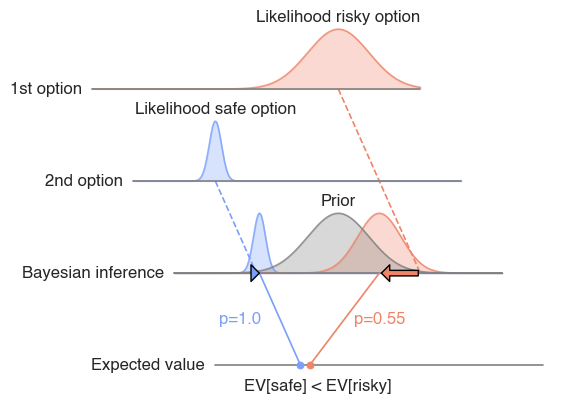

In [11]:
mu_evidence_risky, std_evidence_risky = 7., .75
mu_evidence_safe, std_evidence_safe = 3.0, .15
mu_prior, std_prior = (mu_evidence_risky+mu_evidence_safe)/2, .75
mu_posterior_risky, std_posterior_risky = get_posterior(mu_evidence_risky, std_evidence_risky, mu_prior, std_prior)
mu_posterior_safe, std_posterior_safe = get_posterior(mu_evidence_safe, std_evidence_safe, mu_prior, std_prior)

palette = sns.color_palette('coolwarm', 4)[::-1]

plot_dist(mu_evidence_risky, std_evidence_risky, color=palette[0])

plot_dist(mu_evidence_safe, std_evidence_safe, -1.0, color=palette[3])

plot_dist(mu_posterior_risky, std_posterior_risky, -2.0, color=palette[0])
plot_dist(mu_posterior_safe, std_posterior_safe, -2.0, color=palette[3])
plt.plot([mu_evidence_risky, mu_evidence_risky+2], [0.0, -2.], ls='--', c=palette[0])
plot_dist(mu_prior, std_prior, -2.0, color='gray')

plt.plot([mu_evidence_safe+1, mu_evidence_safe+2], [-1.0, -2.], ls='--', c=palette[3])

plt.annotate('', xytext=(2+mu_evidence_safe, -2), xy=(2+mu_posterior_safe, -2), arrowprops={"facecolor":palette[3], 'edgecolor':'k', "linewidth":1., 'shrink':0.05, 'headlength':6})
plt.annotate('', xytext=(2+mu_evidence_risky, -2), xy=(2+mu_posterior_risky, -2), arrowprops={"facecolor":palette[0], "linewidth":1., 'edgecolor':'k', 'shrink':0.05, 'headlength':6})


for ix in range(4):
    plt.plot([ix+1, ix+9], [-ix, -ix], c='gray', ls='-')


plt.gca().annotate('1st option', (.75, 0.0), ha='right', va='center')
plt.gca().annotate('Likelihood risky option', (mu_evidence_risky, .7), ha='center', va='bottom')

plt.gca().annotate('2nd option', (1.75, -1.0), ha='right', va='center')
plt.gca().annotate('Likelihood safe option', (1+mu_evidence_safe, -.3), ha='center', va='bottom')

plt.gca().annotate('Prior', (2+mu_prior, -1.3), ha='center', va='bottom')
# plt.gca().annotate('Safe posterior', (mu_posterior_safe+1.5, -1.5), ha='right', va='bottom')
# plt.gca().annotate('Risky posterior', (mu_posterior_risky+2.75, -1.5), ha='left', va='bottom')

plt.gca().annotate('Bayesian inference', (2.75, -2.0), ha='right', va='center')
plt.gca().annotate('Expected value', (3.75, -3.0), ha='right', va='center')

plt.gca().annotate('p=0.55', (8., -2.5),  ha='center', va='center', color=palette[0])
plt.gca().annotate('p=1.0', (4.6, -2.5),  ha='center', va='center', color=palette[3])

plt.gca().annotate('EV[safe] < EV[risky]', (6.5, -3.15),  ha='center', va='top')

plt.scatter([3+mu_posterior_safe], [-3.], color=palette[3], zorder=10)
plt.scatter([3+mu_posterior_risky*.55], [-3.], color=palette[0], zorder=10)

plt.plot([mu_posterior_safe+2, mu_posterior_safe+3], [-2, -3], color=palette[3])
plt.plot([mu_posterior_risky+2, mu_posterior_risky*.55+3], [-2, -3], color=palette[0])


plt.axis('off')
plt.savefig('/data/ds-risk/derivatives/figures/illustration_risky_first.pdf', bbox_inches='tight')

In [14]:
np.log(.55)

-0.5978370007556204

(0.44999999999999996, 12.55, -3.1825, 0.8325)

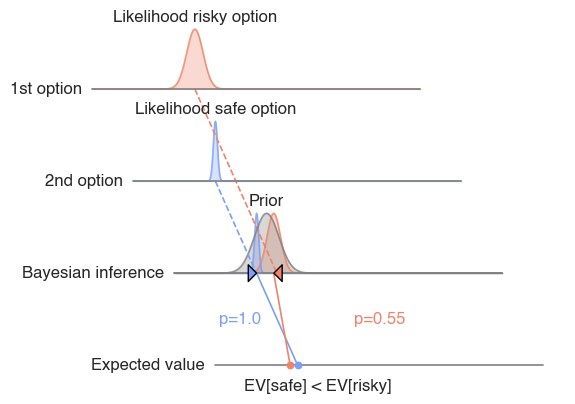

In [16]:
mu_evidence_risky, std_evidence_risky = 3.5, .2
mu_evidence_safe, std_evidence_safe = 3.0, .05
mu_prior, std_prior = (mu_evidence_risky+mu_evidence_safe)/2, .3
mu_posterior_risky, std_posterior_risky = get_posterior(mu_evidence_risky, std_evidence_risky, mu_prior, std_prior)
mu_posterior_safe, std_posterior_safe = get_posterior(mu_evidence_safe, std_evidence_safe, mu_prior, std_prior)

palette = sns.color_palette('coolwarm', 4)[::-1]

plot_dist(mu_evidence_risky, std_evidence_risky, color=palette[0])

plot_dist(mu_evidence_safe, std_evidence_safe, -1.0, color=palette[3])

plot_dist(mu_posterior_risky, std_posterior_risky, -2.0, color=palette[0])
plot_dist(mu_posterior_safe, std_posterior_safe, -2.0, color=palette[3])
plt.plot([mu_evidence_risky, mu_evidence_risky+2], [0.0, -2.], ls='--', c=palette[0])
plot_dist(mu_prior, std_prior, -2.0, color='gray')

plt.plot([mu_evidence_safe+1, mu_evidence_safe+2], [-1.0, -2.], ls='--', c=palette[3])

plt.annotate('', xytext=(2+mu_evidence_safe, -2), xy=(2+mu_posterior_safe, -2), arrowprops={"facecolor":palette[3], 'edgecolor':'k', "linewidth":1., 'shrink':0.05, 'headlength':6})
plt.annotate('', xytext=(2+mu_evidence_risky, -2), xy=(2+mu_posterior_risky, -2), arrowprops={"facecolor":palette[0], "linewidth":1., 'edgecolor':'k', 'shrink':0.05, 'headlength':6})


for ix in range(4):
    plt.plot([ix+1, ix+9], [-ix, -ix], c='gray', ls='-')


plt.gca().annotate('1st option', (.75, 0.0), ha='right', va='center')
plt.gca().annotate('Likelihood risky option', (mu_evidence_risky, .7), ha='center', va='bottom')

plt.gca().annotate('2nd option', (1.75, -1.0), ha='right', va='center')
plt.gca().annotate('Likelihood safe option', (1+mu_evidence_safe, -.3), ha='center', va='bottom')

plt.gca().annotate('Prior', (2+mu_prior, -1.3), ha='center', va='bottom')
# plt.gca().annotate('Safe posterior', (mu_posterior_safe+1.5, -1.5), ha='right', va='bottom')
# plt.gca().annotate('Risky posterior', (mu_posterior_risky+2.75, -1.5), ha='left', va='bottom')

plt.gca().annotate('Bayesian inference', (2.75, -2.0), ha='right', va='center')
plt.gca().annotate('Expected value', (3.75, -3.0), ha='right', va='center')

plt.gca().annotate('p=0.55', (8., -2.5),  ha='center', va='center', color=palette[0])
plt.gca().annotate('p=1.0', (4.6, -2.5),  ha='center', va='center', color=palette[3])

plt.gca().annotate('EV[safe] < EV[risky]', (6.5, -3.15),  ha='center', va='top')

plt.scatter([3+mu_posterior_safe], [-3.], color=palette[3], zorder=10)
plt.scatter([3+mu_posterior_risky+np.log(.55)], [-3.], color=palette[0], zorder=10)

plt.plot([mu_posterior_safe+2, mu_posterior_safe+3], [-2, -3], color=palette[3])
plt.plot([mu_posterior_risky+2, mu_posterior_risky+np.log(.55)+3], [-2, -3], color=palette[0])


plt.axis('off')
# plt.savefig('/data/ds-risk/derivatives/figures/illustration_risky_first.pdf', bbox_inches='tight')

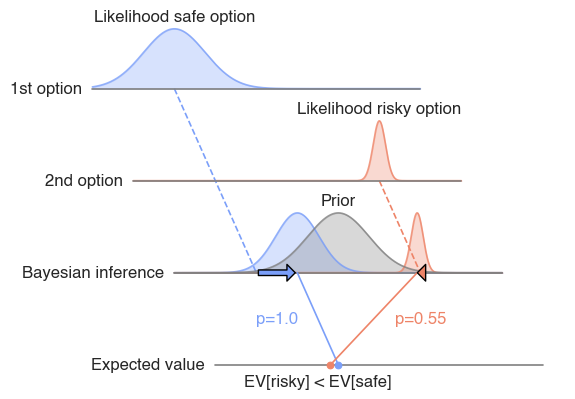

In [420]:
mu_evidence_risky, std_evidence_risky = 7., .15
mu_evidence_safe, std_evidence_safe = 3.0, .75
mu_prior, std_prior = (mu_evidence_risky+mu_evidence_safe)/2, .75
mu_posterior_risky, std_posterior_risky = get_posterior(mu_evidence_risky, std_evidence_risky, mu_prior, std_prior)
mu_posterior_safe, std_posterior_safe = get_posterior(mu_evidence_safe, std_evidence_safe, mu_prior, std_prior)

palette = sns.color_palette('coolwarm', 4)[::-1]

plot_dist(mu_evidence_safe, std_evidence_safe, color=palette[3])

plot_dist(mu_evidence_risky, std_evidence_risky, -1.0, color=palette[0])

plot_dist(mu_posterior_safe, std_posterior_safe, -2.0, color=palette[3])
plot_dist(mu_posterior_risky, std_posterior_risky, -2.0, color=palette[0])
plt.plot([mu_evidence_safe, mu_evidence_safe+2], [0.0, -2.], ls='--', c=palette[3])
plot_dist(mu_prior, std_prior, -2.0, color='gray')

plt.plot([mu_evidence_risky+1, mu_evidence_risky+2], [-1.0, -2.], ls='--', c=palette[0])

plt.annotate('', xytext=(2+mu_evidence_safe, -2), xy=(2+mu_posterior_safe, -2), arrowprops={"facecolor":palette[3], 'edgecolor':'k', "linewidth":1., 'shrink':0.05, 'headlength':6})
plt.annotate('', xytext=(2+mu_evidence_risky, -2), xy=(2+mu_posterior_risky, -2), arrowprops={"facecolor":palette[0], "linewidth":1., 'edgecolor':'k', 'shrink':0.05, 'headlength':6})


for ix in range(4):
    plt.plot([ix+1, ix+9], [-ix, -ix], c='gray', ls='-')


plt.gca().annotate('1st option', (.75, 0.0), ha='right', va='center')
plt.gca().annotate('Likelihood safe option', (mu_evidence_safe, .7), ha='center', va='bottom')

plt.gca().annotate('2nd option', (1.75, -1.0), ha='right', va='center')
plt.gca().annotate('Likelihood risky option', (1+mu_evidence_risky, -.3), ha='center', va='bottom')

plt.gca().annotate('Prior', (2+mu_prior, -1.3), ha='center', va='bottom')
# plt.gca().annotate('Safe posterior', (mu_posterior_safe+1.5, -1.5), ha='right', va='bottom')
# plt.gca().annotate('Risky posterior', (mu_posterior_risky+2.75, -1.5), ha='left', va='bottom')

plt.gca().annotate('Bayesian inference', (2.75, -2.0), ha='right', va='center')
plt.gca().annotate('Expected value', (3.75, -3.0), ha='right', va='center')

plt.gca().annotate('p=0.55', (9., -2.5),  ha='center', va='center', color=palette[0])
plt.gca().annotate('p=1.0', (5.5, -2.5),  ha='center', va='center', color=palette[3])

plt.gca().annotate('EV[risky] < EV[safe]', (6.5, -3.1),  ha='center', va='top')

plt.scatter([3+mu_posterior_safe], [-3.], color=palette[3], zorder=10)
plt.scatter([3+mu_posterior_risky*.55], [-3.], color=palette[0], zorder=10)

plt.plot([mu_posterior_safe+2, mu_posterior_safe+3], [-2, -3], color=palette[3])
plt.plot([mu_posterior_risky+2, mu_posterior_risky*.55+3], [-2, -3], color=palette[0])


plt.axis('off')
plt.savefig('/data/ds-risk/derivatives/figures/illustration_safe_first.pdf', bbox_inches='tight')

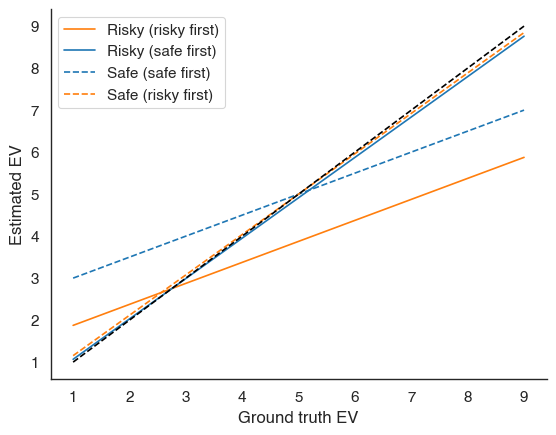

In [417]:
ev = np.linspace(1, 9, 100)
risky_options = ev/.55
safe_options = ev

std_first = .75
std_second = .15

std_prior_scale = 1.

e_ev_risky_first = np.array([get_posterior(ro, std_first, mu_prior, std_prior*std_prior_scale)[0] for ro in risky_options]) * .55
e_ev_risky_second = np.array([get_posterior(ro, std_second, mu_prior, std_prior*std_prior_scale)[0] for ro in risky_options]) * .55
e_ev_safe_first = np.array([get_posterior(so, std_first, mu_prior, std_prior*std_prior_scale)[0] for so in safe_options])
e_ev_safe_second = np.array([get_posterior(so, std_second, mu_prior, std_prior*std_prior_scale)[0] for so in safe_options])


plt.plot(ev, e_ev_risky_first, label='Risky (risky first)', color=sns.color_palette()[1])
plt.plot(ev, e_ev_risky_second, label='Risky (safe first)', color=sns.color_palette()[0])

plt.plot(ev, e_ev_safe_first, color=sns.color_palette()[0], ls='--', label='Safe (safe first)')
plt.plot(ev, e_ev_safe_second, color=sns.color_palette()[1], ls='--', label='Safe (risky first)')

plt.plot([1, 9], [1, 9], c='k', ls='--')
plt.legend()

plt.xlabel('Ground truth EV')
plt.ylabel('Estimated EV')
# risky_ev_second = [get_posterior(ro, .15, mu_prior, std_prior)[0] for ro in risky_options]

# plt.plot(risky_options, risky_ev_first)
# plt.plot(risky_options, risky_ev_second)
sns.despine()

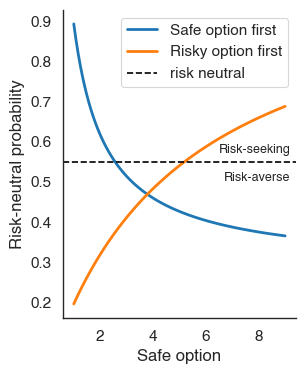

In [437]:
plt.plot(safe_options,  e_ev_risky_first/ e_ev_safe_second*.55, lw=2, label='Safe option first')
plt.plot(safe_options, e_ev_risky_second / e_ev_safe_first*.55, lw=2, label='Risky option first')
plt.axhline(.55, c='k', ls='--', label='risk neutral')

sns.despine()
plt.ylabel('Risk-neutral probability')
plt.xlabel('Safe option')
plt.annotate('Risk-seeking', (9.2, .565), ha='right', va='bottom', fontsize=9.)
plt.annotate('Risk-averse', (9.2, .525), ha='right', va='top', fontsize=9.)
plt.legend()


plt.gcf().set_size_inches(3, 4)
plt.savefig('/data/ds-risk/derivatives/figures/illustration_safe_vs_rnp.pdf', bbox_inches='tight')

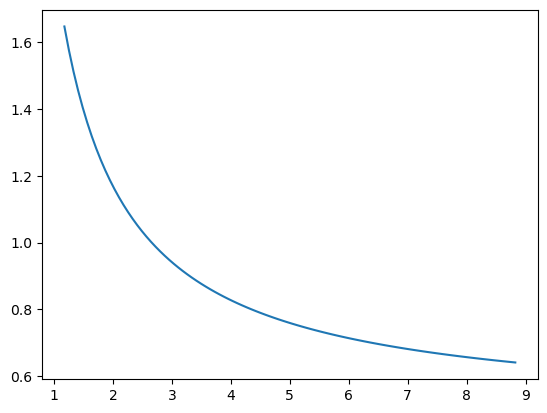

In [224]:
e_ev_risky_first / e_ev_safe_second

array([0.82304721, 0.82037811, 0.81782521, 0.81538107, 0.81303889,
       0.81079242, 0.80863591, 0.80656406, 0.80457199, 0.80265516,
       0.8008094 , 0.79903084, 0.79731585, 0.7956611 , 0.79406346,
       0.79252004, 0.7910281 , 0.78958513, 0.78818875, 0.78683674,
       0.78552702, 0.78425763, 0.78302673, 0.78183262, 0.78067365,
       0.7795483 , 0.77845514, 0.77739278, 0.77635997, 0.77535547,
       0.77437814, 0.77342689, 0.77250069, 0.77159857, 0.7707196 ,
       0.76986289, 0.76902762, 0.76821298, 0.76741823, 0.76664264,
       0.76588553, 0.76514625, 0.76442416, 0.7637187 , 0.76302927,
       0.76235535, 0.76169641, 0.76105196, 0.76042153, 0.75980467,
       0.75920094, 0.75860992, 0.75803123, 0.75746448, 0.7569093 ,
       0.75636534, 0.75583226, 0.75530975, 0.75479749, 0.75429518,
       0.75380254, 0.75331928, 0.75284515, 0.75237989, 0.75192324,
       0.75147498, 0.75103487, 0.7506027 , 0.75017825, 0.74976131,
       0.74935169, 0.7489492 , 0.74855366, 0.74816487, 0.74778